# Data Science Assignment 1 Question A


Loading the data

In [1]:
import pandas as pd
population = pd.read_csv('EstimatedResidentPopulationByStateAndGender.csv')
import matplotlib.pyplot as plt
#print(population.head())

population = population[['Unnamed: 0', 'Estimated Resident Population ;  Persons ;  New South Wales ;',
                  'Estimated Resident Population ;  Persons ;  Victoria ;',
                  'Estimated Resident Population ;  Persons ;  Queensland ;',
                  'Estimated Resident Population ;  Persons ;  South Australia ;',
                  'Estimated Resident Population ;  Persons ;  Western Australia ;',
                  'Estimated Resident Population ;  Persons ;  Tasmania ;',
                  'Estimated Resident Population ;  Persons ;  Northern Territory ;',
                  'Estimated Resident Population ;  Persons ;  Australian Capital Territory ;']]

population = population.rename(columns={'Unnamed: 0':'date',
                                        'Estimated Resident Population ;  Persons ;  Victoria ;':'VIC',
                                        'Estimated Resident Population ;  Persons ;  New South Wales ;':'NSW',
                                        'Estimated Resident Population ;  Persons ;  Queensland ;': 'QLD',
                                        'Estimated Resident Population ;  Persons ;  South Australia ;':'SA',
                                        'Estimated Resident Population ;  Persons ;  Western Australia ;':'WA',
                                        'Estimated Resident Population ;  Persons ;  Tasmania ;':'TAS',
                                        'Estimated Resident Population ;  Persons ;  Northern Territory ;':'NT',
                                        'Estimated Resident Population ;  Persons ;  Australian Capital Territory ;':"ACT"})
population['date'] = population['date'].astype('datetime64[ns]')

#population = population[['date','VIC', 'NSW', 'QLD','Australia']]
popmelt = pd.melt(population,id_vars=['date'])
popmelt = popmelt.rename(columns={'variable':'state', 'value':'population'})
popmelt.tail()

,date,state,population
307,2014-06-01,ACT,385397
308,2014-09-01,ACT,386548
309,2014-12-01,ACT,387548
310,2015-03-01,ACT,389781
311,2015-06-01,ACT,390757


<h2>Question 1.1</h2>
<p>Plotting population of Victoria, New South Wales and Queensland against date. (As mentioned in the question, instead of date, Date Index is used)</p>
<p>
Red   : New South Wales <br>
Green : Victoria <br>
BLue  : Queensland <br><br>
<p>

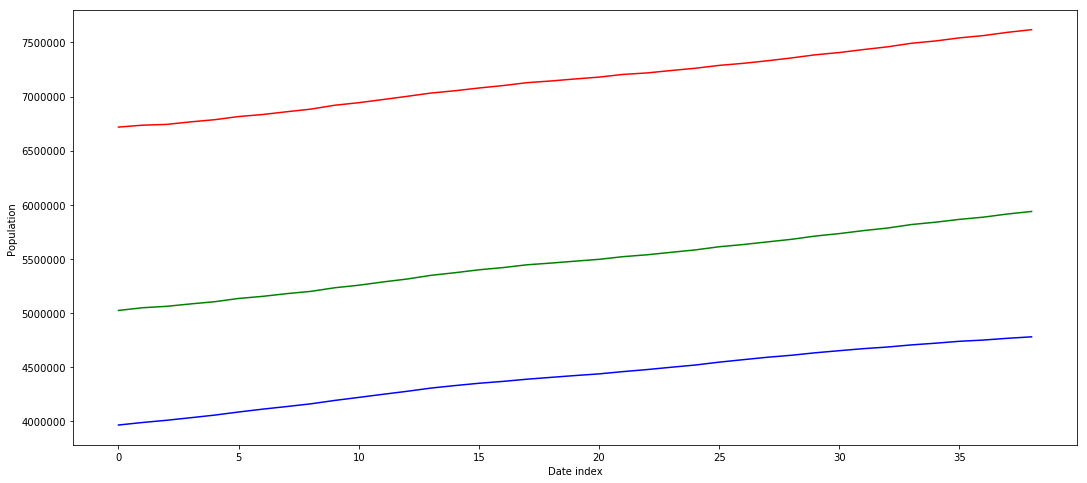

In [2]:
%matplotlib inline
fig, a11=plt.subplots(figsize=(18,8))
a11.plot(population['VIC'], 'g-')
a11.plot(population['QLD'], 'b-')
a11.plot(population['NSW'], 'r-')
a11.set_xlabel('Date index')
a11.set_ylabel('Population')

<p>1.1. Population values increase over time <br>
1.2. The population shows a uniformaly increasing trend in all states</p>

<h2>Question 1.2</h2>
<p>Fitting a linear regression to the Victorian population data and plotting the linear fit.</p>

[24043.700202429143, 5018205.5423076926, 0.99942274965458544, 5.8494684778685482e-56, 134.36483604145039]


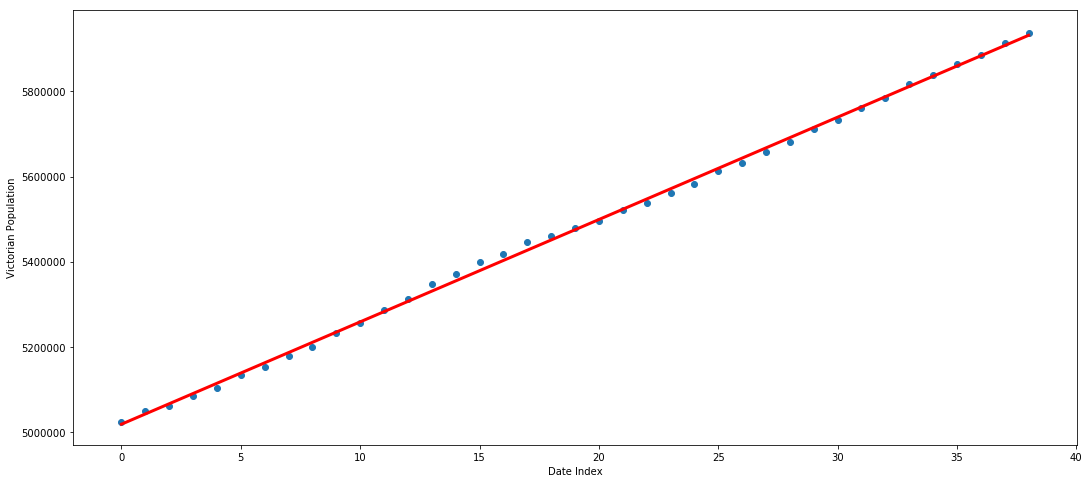

In [3]:
from scipy.stats import linregress
slope, intercept, r_value, p_value, std_err = linregress(range(0,39), population['VIC'])
print([slope, intercept, r_value, p_value, std_err])
line = [slope*xi + intercept for xi in range(0,39)]
fig, a12 = plt.subplots(figsize=(18,8))
a12.plot(range(0,39),line,'r-', linewidth=3)
a12.scatter(range(0,39), population['VIC'])
a12.set_xlabel('Date Index')
a12.set_ylabel('Victorian Population')

1. Yes, the linear fit looks good  

2. Predicting population <br>
a)1-09-2015</u> : 39 
     Population = slope*x + intercept <br>
                = 24043.700202429143 * 39 + 5018205.5423076926 
                = 5955910 
b)1-12-2015 : 40 
     Population = slope*x + intercept 
                = 24043.700202429143 * 40 + 5018205.5423076926 
                = 5979954
c)1-12-2016 : 44
    Population = slope*x + intercept 
                = 24043.700202429143 * 44  + 5018205.5423076926 
                = 6076128             
d)1-12-2017 : 48
    Population = slope*x + intercept 
                = 24043.700202429143 * 48  + 5018205.5423076926 
                = 6172303

<h2>Question 2.1</h2>
<p>Plotting Job vacancy count for Victoria over time</p>

In [4]:
job = pd.read_csv('JobVacancies.csv', header = None)
job = job.transpose()
job = job.rename(columns = job.iloc[0])
job = job[job.State != 'State']
jobmelt = pd.melt(job,id_vars=['State'])
jobmelt = jobmelt.rename(columns={'State':'date', 'variable':'state', 'value':'job'})

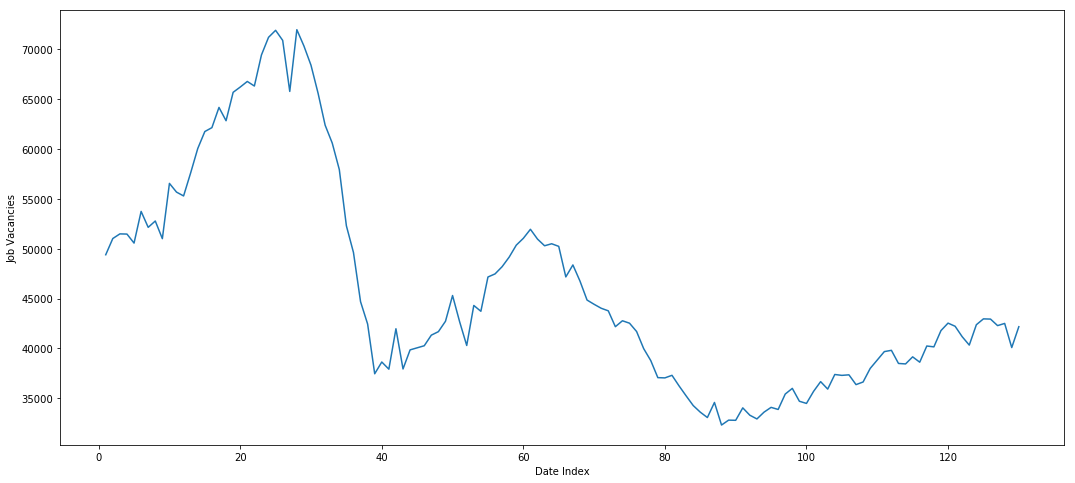

In [5]:
%matplotlib inline
fig, a21 = plt.subplots(figsize=(18,8))
a21.plot(job['VIC'])
a21.set_xlabel('Date Index')
a21.set_ylabel('Job Vacancies')

In [6]:
print("1a. The maximum job vacancy in Victoria")
print(max(job['VIC']))
print()
print("1b. The minimum job vacancy in Victoria")
print(min(job['VIC']))

1a. The maximum job vacancy in Victoria
71971.4

1b. The minimum job vacancy in Victoria
32322.2


<h2>Question 2.2a</h2>
<p>Plotting Linear Regression for whole data</p>

-200.194976853 59101.6125224 -0.71009756215 3.0931393721e-21 17.5455322588


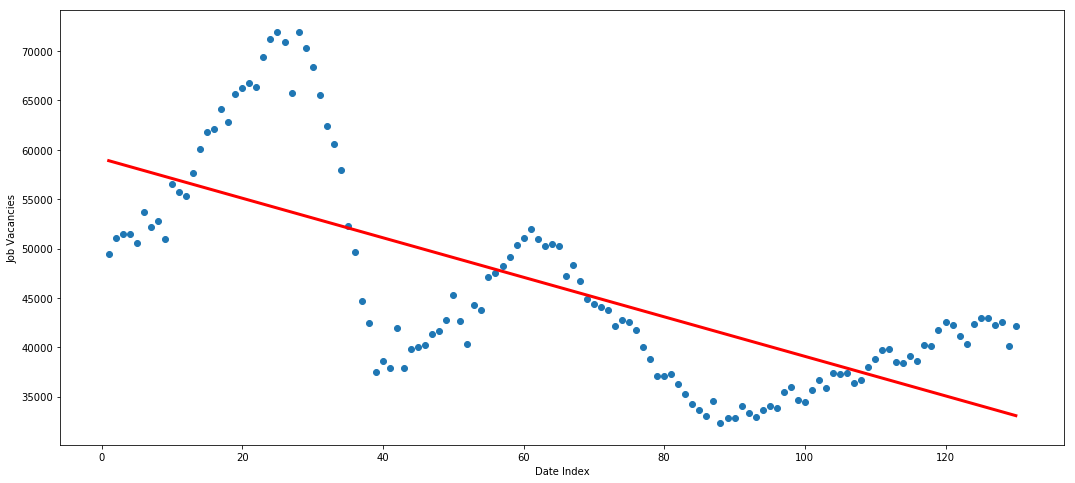

In [7]:
from scipy.stats import linregress
slope, intercept, r_value, p_value, std_err = linregress(range(1,131),job.VIC.astype('float'))
print(slope, intercept, r_value, p_value, std_err)
line = [slope*xi + intercept for xi in range(1,131)]
fig, a22a = plt.subplots(figsize=(18,8)) 
a22a.plot(range(1,131),line,'r-', linewidth=3)
a22a.scatter(range(1,131), job['VIC'])
a22a.set_xlabel('Date Index')
a22a.set_ylabel('Job Vacancies')

This doesnt seem to be a good fit. This will not give good predictions

<h2>Question 2.2b</h2>
<p>Plotting Linear Regression for most recent data points</p>

254.637429644 33049.8176923 0.954833673073 1.26120376488e-21 12.8547906923


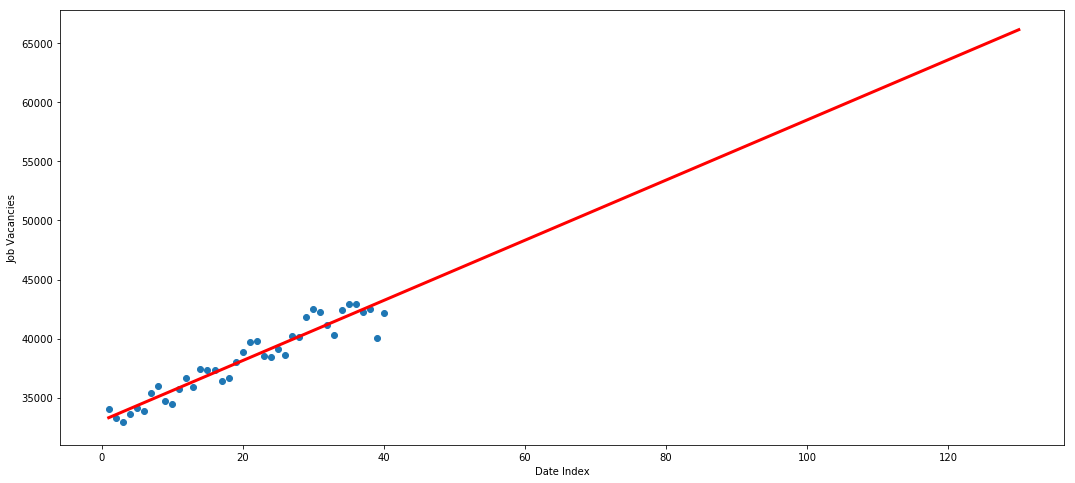

In [8]:
slope, intercept, r_value, p_value, std_err = linregress(range(1,41),job.VIC.tail(40).astype('float'))
print(slope, intercept, r_value, p_value, std_err)
line = [slope*xi + intercept for xi in range(1,131)]
fig, a22b = plt.subplots(figsize = (18,8))
a22b.plot(range(1,131),line,'r-', linewidth=3)
a22b.scatter(range(1,41), job['VIC'].tail(40))
a22b.set_xlabel('Date Index')
a22b.set_ylabel('Job Vacancies')

Yes, This model would provide better predictions

<h2>Question 3.1</h2>
<p>Plotting the Unemployment Rate for Victoria over time.</p>

In [11]:
emp = pd.read_excel('EmploymentTimeSeries.xls', sheetname='Time Series')
emp = emp.rename(columns={'State/Territory':'state', 'Unemployment Rate (15+)':'unrate','Date':'date'})

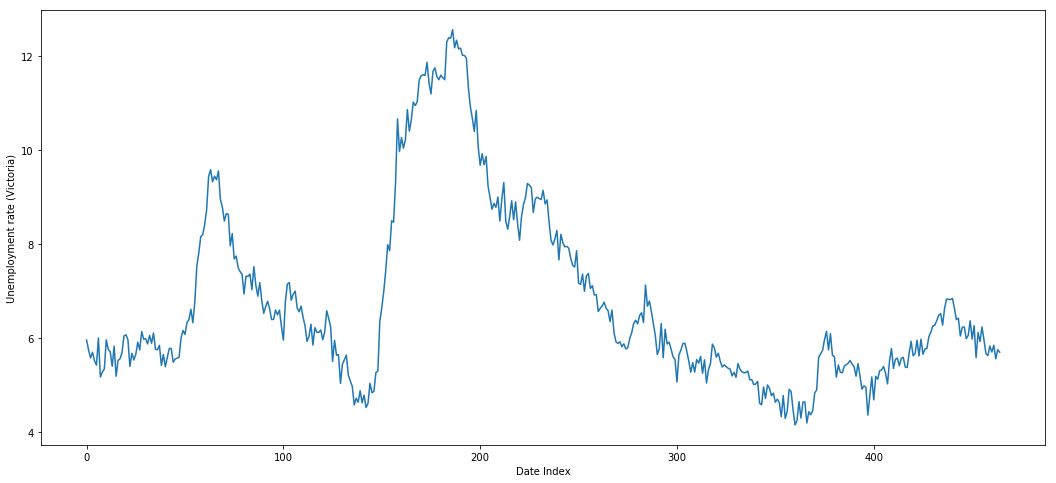

In [12]:
fig, a31 = plt.subplots(figsize = (18,8)) 
a31.plot(range(0,465), emp[emp['state']=='VIC'].unrate)
a31.set_xlabel('Date Index')
a31.set_ylabel('Unemployment rate (Victoria)')

In [13]:
print("Mximum Unemployment rate : ")
print(max(emp[emp['state']=='VIC'].unrate))
print("When did it occur : ")
print(emp[emp['state']=='VIC'][emp.unrate == 12.5533377].date)

Mximum Unemployment rate : 
12.5533377
When did it occur : 
651   1993-08-01
Name: date, dtype: datetime64[ns]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


ie. Maximum Unemployment rate was 12.5533377 and it occured on 1993-08-01

<h2>Question 4.1</h2>
<p>Combining the data from different files into a table.</p>

In [14]:
popmelt['date'] = popmelt['date'].astype('datetime64[ns]')
jobmelt['date'] = jobmelt['date'].astype('datetime64[ns]')
joined = pd.merge(popmelt, emp, on=['date','state'])
joined = pd.merge(jobmelt,joined,on=['date','state'])
joined = joined [['date', 'state', 'job', 'population','unrate']]
joined


,date,state,job,population,unrate
0,2006-03-01,NSW,75246.3,6735528,4.978780
1,2006-06-01,NSW,81637.1,6742690,5.288439
2,2006-09-01,NSW,76411.3,6766133,5.200780
3,2006-12-01,NSW,80972.6,6786160,4.811675
4,2007-03-01,NSW,88785,6815359,4.957025
5,2007-06-01,NSW,90149.9,6834156,4.574077
6,2007-09-01,NSW,95386.5,6859736,4.655129
7,2007-12-01,NSW,101372,6883852,4.647184
8,2008-03-01,NSW,100356.9,6919907,4.337943
9,2008-06-01,NSW,96677,6943461,4.565160


The first date in 01-03-2006 and the last date is 101-06-2015

<h2>Question 4.2</h2>
<p>Plotting Unemployment vs Number of job vacancies.</p>

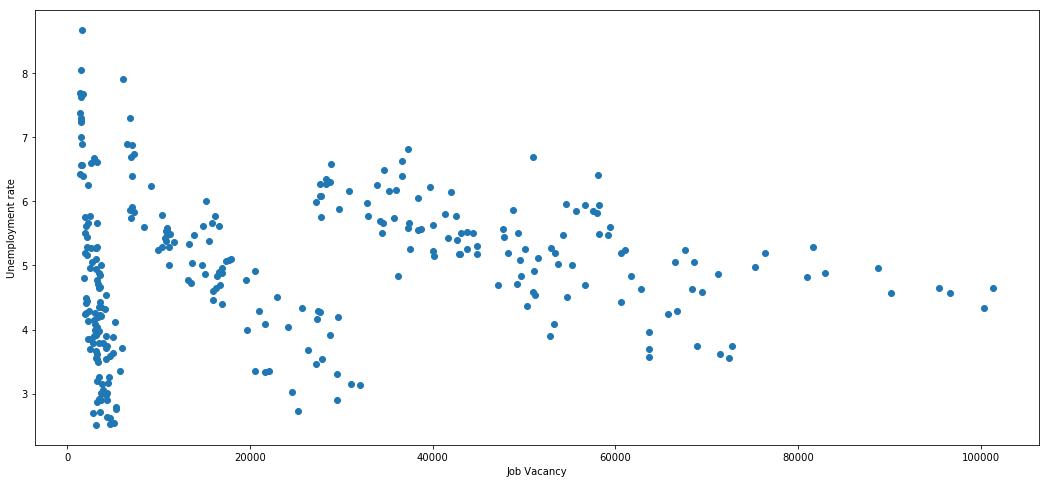

In [16]:
fig, a42 = plt.subplots(figsize=(18,8))
a42.scatter(joined.job, joined.unrate)
a42.set_xlabel("Job Vacancy")
a42.set_ylabel("Unemployment rate")

This makes no sense as the points are located in everywhere

<h2>Question 4.3</h2>
<p>Plotting Unemployment vs Number of job vacancies for Victoria only</p>

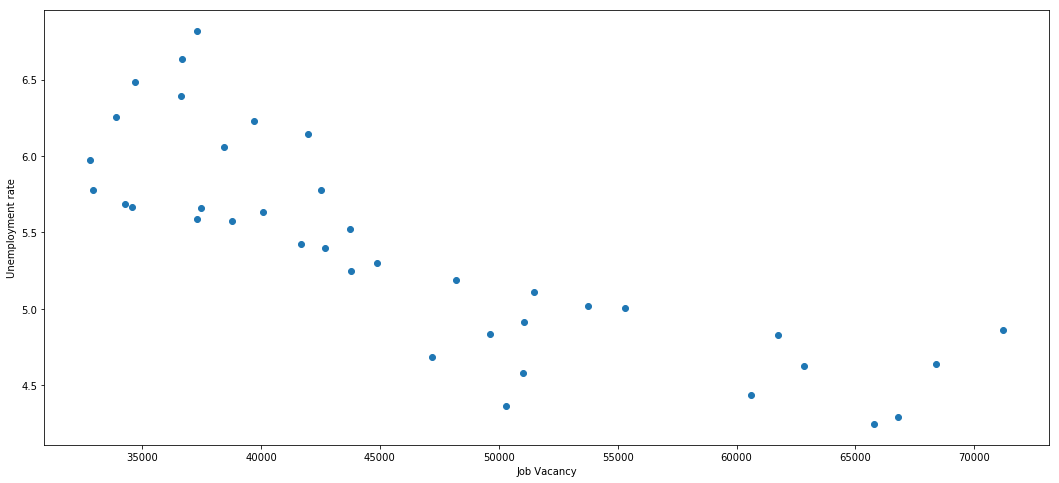

In [17]:
fig, a43 = plt.subplots(figsize=(18,8))
a43.scatter(joined[joined.state == 'VIC'].job, joined[joined.state == 'VIC'].unrate)
a43.set_xlabel("Job Vacancy")
a43.set_ylabel("Unemployment rate")

The points are located in as belt from high unemployment rate to high job count. This means they shows an inverse relation (ie when job count incresed, unemployment rate decrases). To get a better idea, both are plotted against date index below.

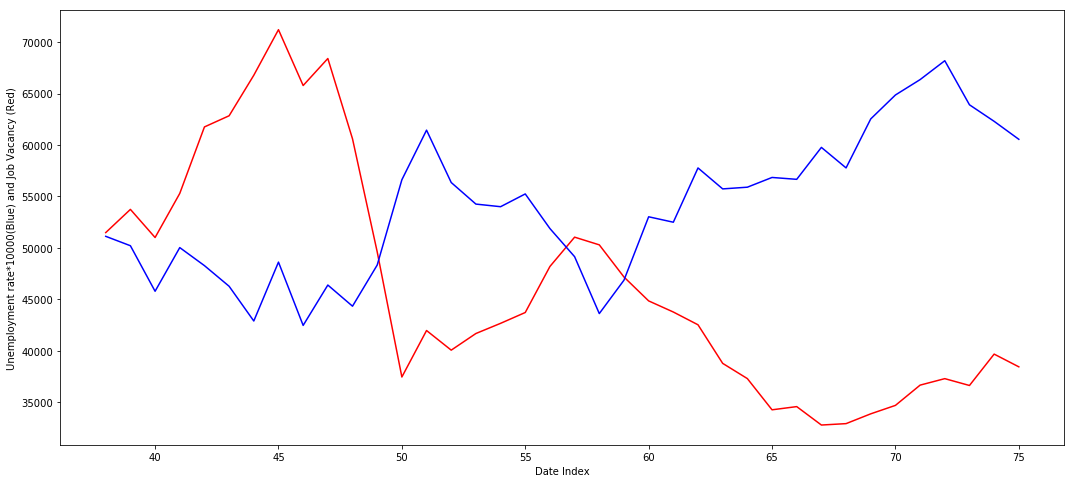

In [18]:
fig, a43b = plt.subplots(figsize=(18,8))
a43b.plot(joined[joined.state == 'VIC'].job, 'r-')
a43b.plot(joined[joined.state == 'VIC'].unrate*10000, 'b-')
a43b.set_xlabel("Date Index")
a43b.set_ylabel("Unemployment rate*10000(Blue) and Job Vacancy (Red)")

The above graph clearly shows that there is an inverse relationship between the job count and unemployment rate.

<h2>Question 4.4</h2>
<p>Adding new column for vacancy rate and plotting</p>

In [19]:
joined[['job']] = joined[['job']].astype('float')
joined['jobrate'] = joined.job/joined.population*100
joined

,date,state,job,population,unrate,jobrate
0,2006-03-01,NSW,75246.3,6735528,4.978780,1.117155
1,2006-06-01,NSW,81637.1,6742690,5.288439,1.210750
2,2006-09-01,NSW,76411.3,6766133,5.200780,1.129320
3,2006-12-01,NSW,80972.6,6786160,4.811675,1.193202
4,2007-03-01,NSW,88785.0,6815359,4.957025,1.302719
5,2007-06-01,NSW,90149.9,6834156,4.574077,1.319108
6,2007-09-01,NSW,95386.5,6859736,4.655129,1.390527
7,2007-12-01,NSW,101372.0,6883852,4.647184,1.472606
8,2008-03-01,NSW,100356.9,6919907,4.337943,1.450264
9,2008-06-01,NSW,96677.0,6943461,4.565160,1.392346


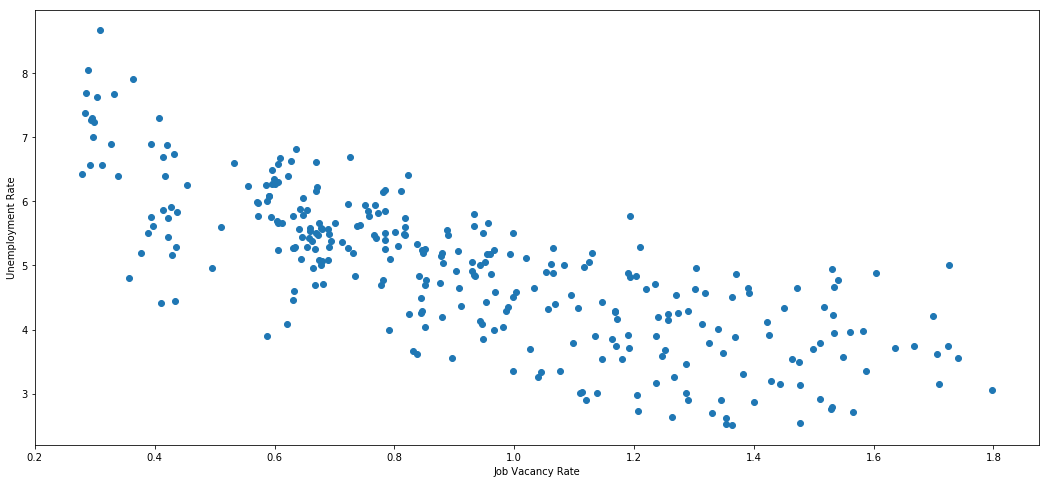

In [20]:
fig, a44 = plt.subplots(figsize=(18,8))
a44.scatter(joined.jobrate, joined.unrate)
a44.set_xlabel("Job Vacancy Rate")
a44.set_ylabel("Unemployment Rate")

This shows an inverse relationship between vacancy rate and unemployment just like in the case of Victoria's data. To get better understanding, both are plotted against the date. 

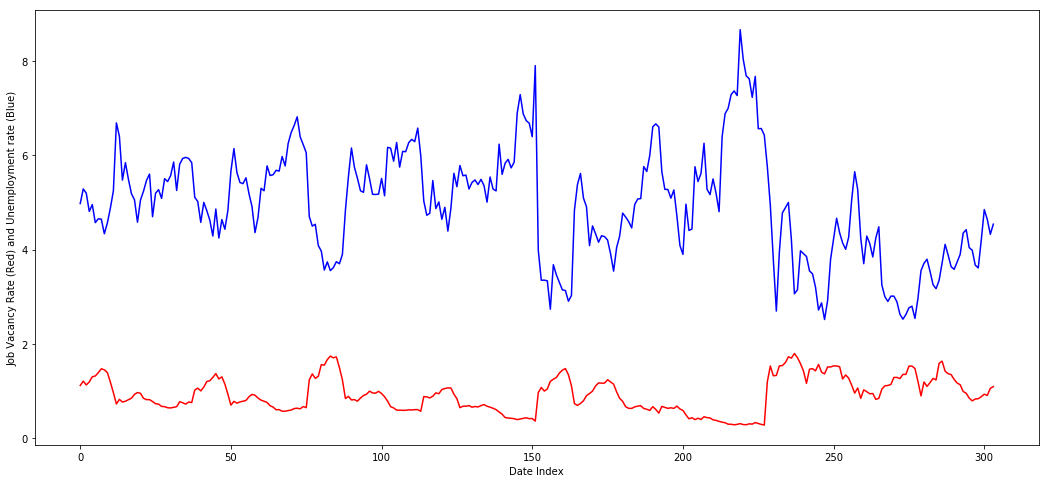

In [21]:
fig, a44b = plt.subplots(figsize=(18,8))
a44b.plot(joined.jobrate, 'r-')
a44b.plot(joined.unrate, 'b-')
a44b.set_xlabel("Date Index")
a44b.set_ylabel("Job Vacancy Rate (Red) and Unemployment rate (Blue)")

Although not so clear as in the case of Victoria's data, it shows an inverse relation ship between the vacancy rate and the unemployment rate

<h2>Question 5.1</h2>
<p>Making Motion Chart</p>

In [22]:
from motionchart.motionchart import MotionChart, MotionChartDemo

In [23]:
%%html
<style>
.output_wrapper, .output {
    height:auto !important;
    max-height:1000px;  /* your desired max-height here */
}
.output_scroll {
    box-shadow:none !important;
    webkit-box-shadow:none !important;
}
</style>

In [24]:
joined.date = joined.date.apply(str)
mChart = MotionChart(df = joined, key='date', x='jobrate', y='unrate', xscale='linear', yscale='linear',
                     size='population', color='state', category='state')

mChart.to_notebook()

<h2>Question 5.2</h2>
<p>Answering the questions</p>

1. Generally, Tasmania has the lowest Job Vacancy rate
2. During the 2006-2007 period the Job vacancy rate was increasing and the unemployment rate was decreasing. But after 2007 there is trend of decreasing jobs and increasing unemployment. Compared to 2007 period, the job vacancy rate in 2014/5 is lesser and the unemployment rate is higher which means economy was getting worse.
3. Northern territory generally has higher job vacancy rate and lower unemployment rate. This may be because of the comparitively lower population of NT and higher job opportunities especially from the mining industry. Also there is a lot of infrastructure development projects going on in this region. These also contribute for it's better job vacancy rate. Although the job vacancy rate and unemployment rate alone dont give a clear view (we need to know about salary rate too), from the data it would be economically good to move to NT.
4. During the 2008-2009 period, the unemployment rate increased and the job vacancy rate decreased sharply. This may be due to the Global Financial Crisis occured during this period.
5. An interessting thing is that the two large populated states, Victoria and New South Wales always follow a similar trend. Their plots are often overlaping and moves together which means they shows a similar trend in uneployment rate and job vacancy rate. This may be because of the similar economy the both states have and because of their similar larger population.



# Data Science Assignment 1 Question B

<h1>Question 1</h1>
<p>Summarizing Data</p>

In [25]:
data = pd.read_csv('InsuranceRates.csv')
data.describe()

,BusinessYear,IssuerId,IndividualRate,IndividualTobaccoRate
count,1.269444e+07,1.269444e+07,1.269444e+07,4.932349e+06
mean,2.015034e+03,5.248592e+04,4.098026e+03,5.436911e+02
std,7.940521e-01,2.641263e+04,6.122271e+04,2.945916e+02
min,2.014000e+03,1.004600e+04,0.000000e+00,4.173000e+01
25%,2.014000e+03,3.021900e+04,2.933000e+01,3.391200e+02
50%,2.015000e+03,4.953200e+04,2.916000e+02,4.632900e+02
75%,2.016000e+03,7.652600e+04,4.789800e+02,6.843900e+02
max,2.016000e+03,9.996900e+04,9.999990e+05,6.604610e+03


<h1>Question 1.1</h1>
<p>How many rows and columns are there?</p>

In [26]:
data

,BusinessYear,StateCode,IssuerId,PlanId,Age,IndividualRate,IndividualTobaccoRate
0,2014,AK,21989,21989AK0010001,0-20,29.00,NaN
1,2014,AK,21989,21989AK0020001,Family Option,36.95,NaN
2,2014,AK,21989,21989AK0020001,Family Option,36.95,NaN
3,2014,AK,21989,21989AK0010001,21,32.00,NaN
4,2014,AK,21989,21989AK0010001,22,32.00,NaN
5,2014,AK,21989,21989AK0020001,Family Option,36.95,NaN
6,2014,AK,21989,21989AK0020002,Family Option,32.45,NaN
7,2014,AK,21989,21989AK0010001,23,32.00,NaN
8,2014,AK,21989,21989AK0010001,24,32.00,NaN
9,2014,AK,21989,21989AK0020002,Family Option,32.45,NaN


There are 7 comumns: There are 7 comumns: BusinessYear, IssuerId, StateCode, PlanId, Age, IndividualRate, IndividualTobaccoRate. And 12694445 rows

<h1>Question 1.2</h1>
<p>How many years does the data cover?</p>

In [27]:
data['BusinessYear'].unique()

array([2014, 2015, 2016], dtype=int64)

The data covers 3 years: 2014, 2015, 2016

<h1>Question 1.3</h1>
<p>What are the possible values for 'Age'?</p>

In [28]:
data['Age'].unique()

array(['0-20', 'Family Option', '21', '22', '23', '24', '25', '26', '27',
       '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38',
       '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49',
       '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60',
       '61', '62', '63', '64', '65 and over'], dtype=object)

As shown above, the possible values of ages are
1. '0-20'
2. '65 and over'
3. any age from 21 to 64
4. 'Family Option'

<h1>Question 1.4</h1>
<p>How many states are there</p>

In [29]:
len(data['StateCode'].unique())

39

In [30]:
data['StateCode'].unique()

array(['AK', 'AL', 'AZ', 'FL', 'GA', 'IN', 'LA', 'MO', 'MS', 'NC', 'ND',
       'NJ', 'OK', 'PA', 'SC', 'TN', 'TX', 'WI', 'WY', 'AR', 'DE', 'IL',
       'KS', 'ME', 'MI', 'MT', 'NH', 'NM', 'VA', 'WV', 'IA', 'ID', 'NE',
       'OH', 'SD', 'UT', 'NV', 'OR', 'HI'], dtype=object)

There are 39 states

<h1>Question 1.5</h1>
<p>How many insurance providers are there</p>

In [31]:
len(data['IssuerId'].unique())

910

In [32]:
data['IssuerId'].unique()

array([21989, 38536, 42507, 45858, 73836, 74819, 84859, 12538, 17540,
       44580, 44785, 46211, 46944, 59809, 77233, 82285, 17100, 17454,
       18156, 23307, 30045, 33851, 51485, 52147, 53901, 58292, 60761,
       66105, 70239, 77352, 84251, 86830, 88925, 90264, 91450, 92045,
       99180, 15833, 15980, 16842, 23841, 27357, 30115, 30219, 30252,
       35783, 43274, 48121, 48129, 49193, 51398, 54172, 56503, 57451,
       59667, 77150, 85543, 86382, 97725, 98534, 99787, 28167, 37001,
       45495, 49046, 50491, 50662, 50988, 55612, 63411, 63940, 73231,
       83502, 83761, 86637, 89942, 93332, 17575, 35065, 43499, 45958,
       50816, 56340, 59560, 69051, 83557, 85320, 91920, 18575, 18802,
       19636, 42544, 44965, 67202, 67243, 75409, 78461, 86868, 87390,
       97176, 29416, 30613, 32753, 32904, 34762, 39371, 40807, 44240,
       44527, 48616, 48786, 59976, 68396, 86182, 11324, 46300, 48963,
       49374, 60328, 94237, 11512, 14125, 40411, 40435, 55440, 56346,
       56891, 94482,

As listed above,there are 910 insurance providers

<h1>Question 1.6</h1>
<p>What are the average, maximum and minimum values for the monthly insurance premium cost for an individual? Do those values seem reasonable to you?</p>

In [33]:
print(data['IndividualRate'].mean())
print(data['IndividualRate'].max())
print(data['IndividualRate'].min())

4098.026458581588
999999.0
0.0


Mean value = 4098.026458581588,
Max value = 999999.0,
Min value = 0.0

This doesn't seem to be reasonable. The minimum value is 0 and max value is too large. Some of the data seem to be wrong.

<h1>Question 1.7</h1>
<p>How much more on average do plans for smokers cost??</p>

In [34]:
data['IndividualTobaccoRate'].mean()

543.6910791972659

In [35]:
data[data['IndividualTobaccoRate'].isnull() == False].IndividualRate.mean()

454.78541852718456

In [36]:
data[data['IndividualRate'].isnull() == False].IndividualTobaccoRate.mean()

543.6910791972659

In [37]:
print(543.6910791972659-454.78541852718456)

88.90566067008137


As all the entries does not have IndividualTobacoRate, we are considering only those rows with this field
The difference of average is 88.90566067008137

<h1>Question 2.1</h1>
<p>Plotting Histogram</p>

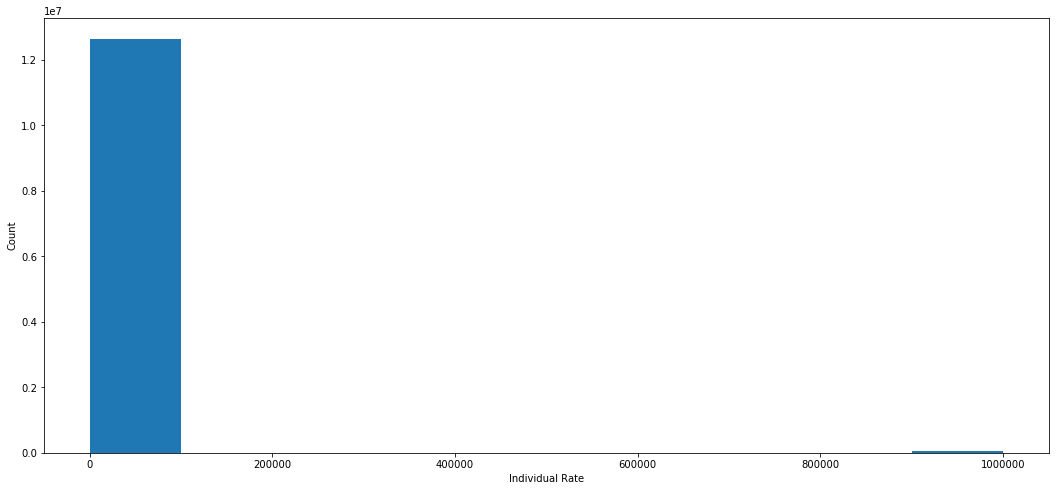

In [38]:
%matplotlib inline
fig, b21 = plt.subplots(figsize=(18,8))
b21.hist(data.IndividualRate, bins = 10)
b21.set_xlabel("Individual Rate")
b21.set_ylabel("Count")

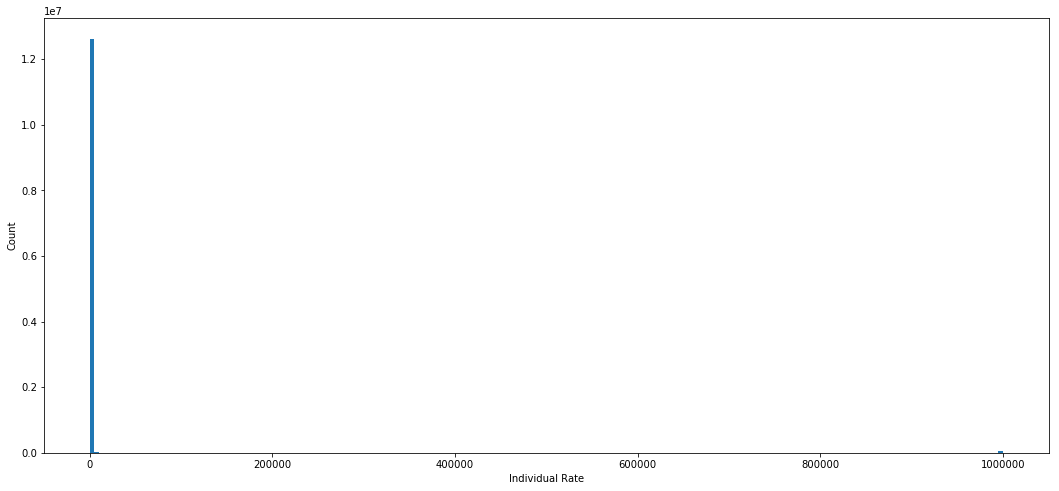

In [39]:
%matplotlib inline
fig, b21b = plt.subplots(figsize=(18,8))
b21b.hist(data.IndividualRate, bins = 200)
b21b.set_xlabel("Individual Rate")
b21b.set_ylabel("Count")

The plot doesn't seem to be looking right. There is a lot of points with value 0 and very high values (eg. 999999). This might be the reason.

<h1>Question 2.2</h1>
<p>Plotting Histogram after modifying data</p>

In [40]:
data1 = data[data['IndividualRate'] > 0]
data1 = data1[data1['IndividualRate'] < 2000]

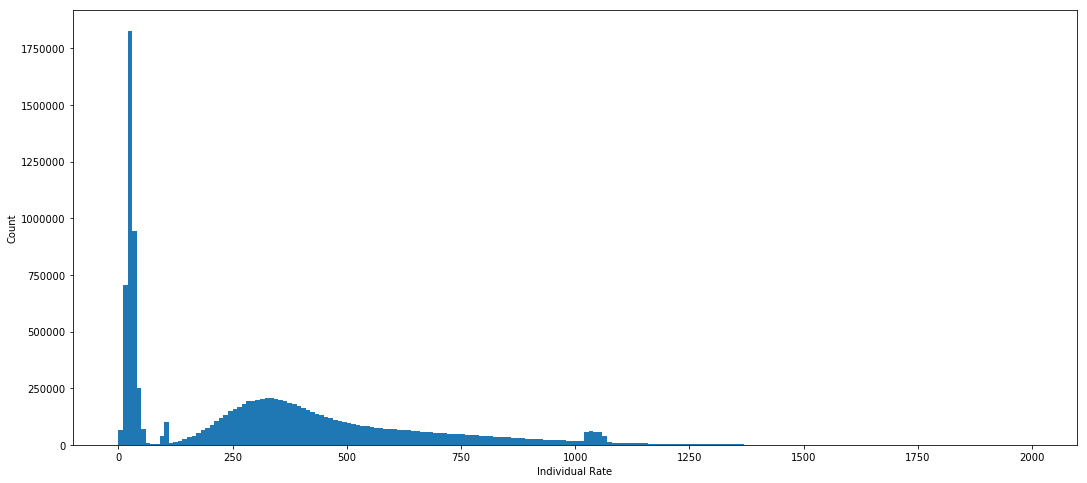

In [41]:
%matplotlib inline
fig, b22 = plt.subplots(figsize=(18,8))
b22.hist(data1.IndividualRate, bins = 200)
b22.set_xlabel("Individual Rate")
b22.set_ylabel("Count")

Histogram seems to be more sensible now. A large numer of entries has individual rate around 0-100. THe distribution shows another small peak after 100 and a gradula increment to values around 300 - 350, and an even more gradual decrement upto around 1350. After this value, the count is negligible for all higher values. 

As we have taken bin as 200, there should be ideally 200 groups. But many ofthem are not visible as the counts are negligible compared to the others


<h1>Question 3.1</h1>
<p>Generate a graph containing boxplots summarising the distribution of values for each state.</p>

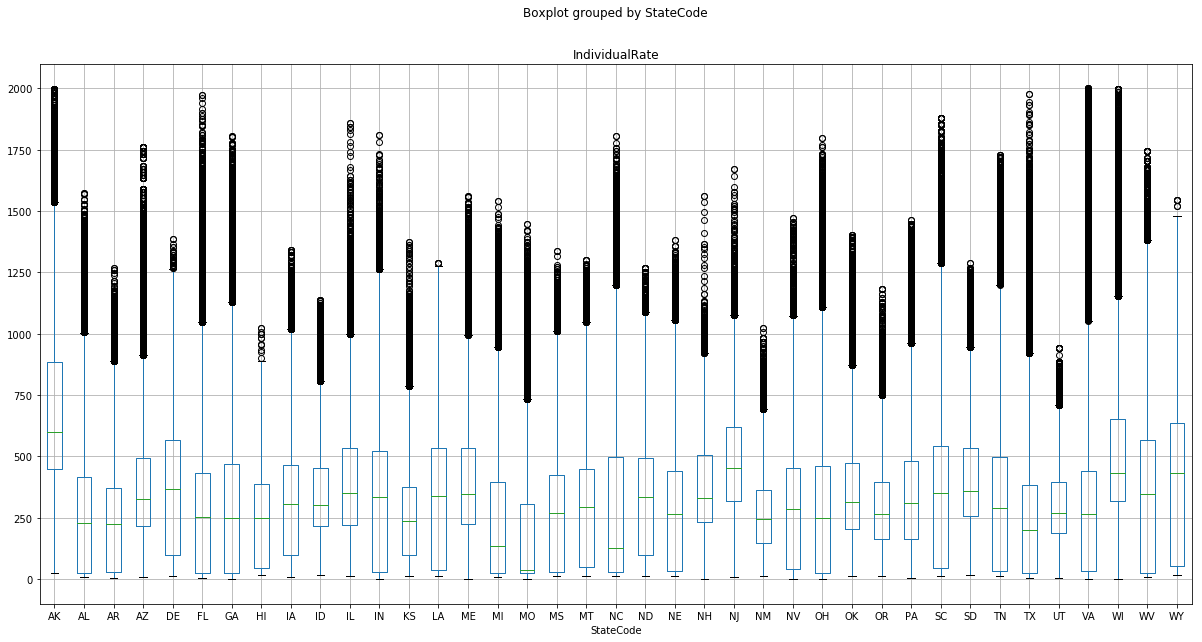

In [42]:
data1.boxplot(column = "IndividualRate", by = "StateCode",figsize=(20,10))

1. State 'MO' (Missouri) shows lowest median and 'AK' Alaska has the highest.
2. The median varies between around 30 to around 600.

<h1>Question 3.2</h1>
<p>Does the number of insurance issuers vary greatly across states?</p>

In [43]:
fun = {'IssuerId':'nunique'}
groupbyState = data.groupby('StateCode').agg(fun)
groupbyState['state']=groupbyState.index

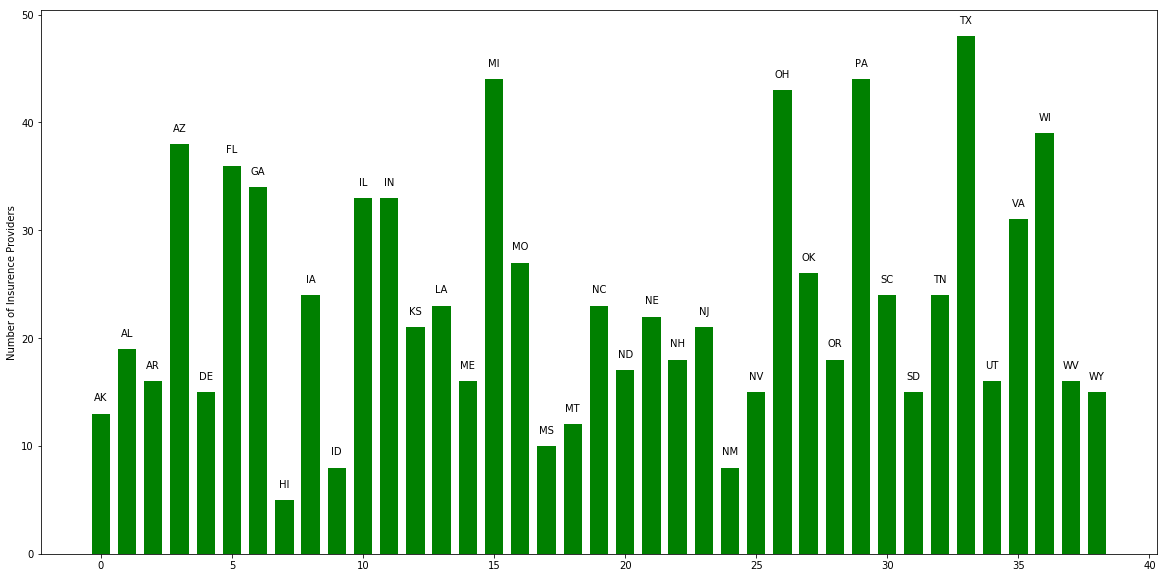

In [44]:
import numpy as np
ind = range(0,39)#np.arange(0, 3*2, 2)
width = .7      # the width of the bars
fig, ax = plt.subplots(figsize=(20,10))
rects1 = ax.bar(ind,groupbyState.IssuerId, width, color='g')
for rect, label in zip(rects1, groupbyState['state']):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 1, label, ha='center', va='bottom')
ax.set_ylabel("Number of Insurence Providers")

The number of insurance providers varies greately accross the states. Some states have only around 10 providers while some others have around 45.

<h1>Question 3.3</h1>
<p>Could competition explain the difference in insurance premiums across states?</p>

In [45]:
fun1 = {'IssuerId':'nunique', 'IndividualRate':'median'}
groupbyState1 = data1.groupby('StateCode').agg(fun1)
groupbyState1.state = groupbyState1.index

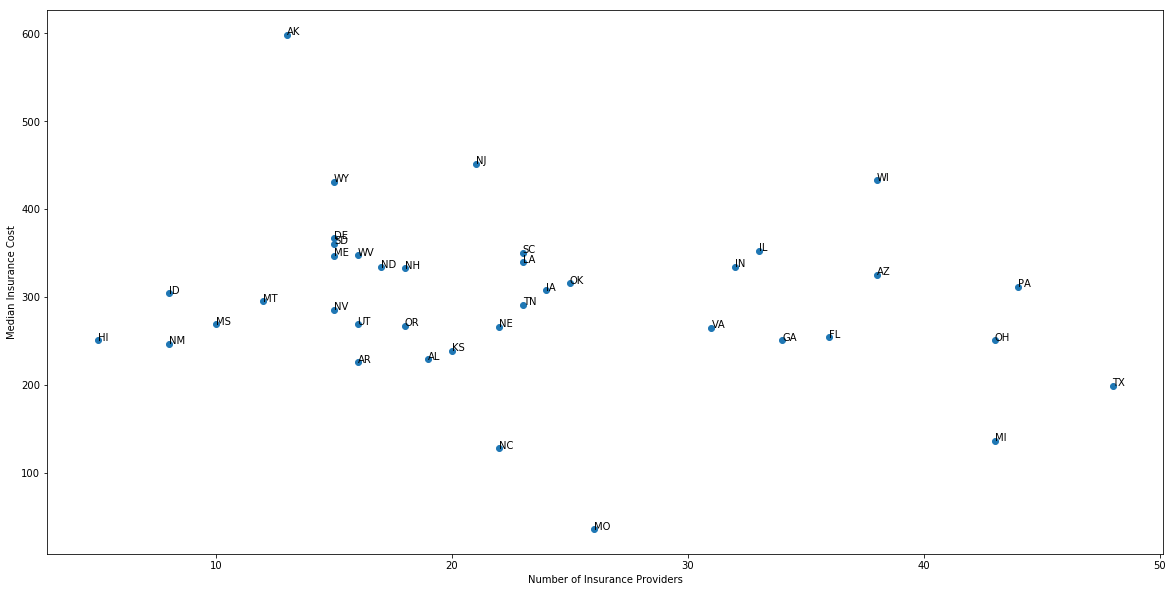

In [46]:
fig, av = plt.subplots(figsize=(20,10))
av.scatter(groupbyState1.IssuerId, groupbyState1.IndividualRate)
i1 = 0
for txt in groupbyState1.state:
    av.annotate(txt, (groupbyState1.IssuerId[i1], groupbyState1.IndividualRate[i1]), size=10)
    i1 = i1+1
av.set_xlabel("Number of Insurance Providers")
av.set_ylabel("Median Insurance Cost")

The plot does not show any clear relation between the number of insurance providers and the median premium amount. So it can be concluded that the competition is apparently the main reason for the variation in medium cost.

<h1>Question 4</h1>
<p>Generate boxplots (or other plots) of insurance costs versus year and age</p>

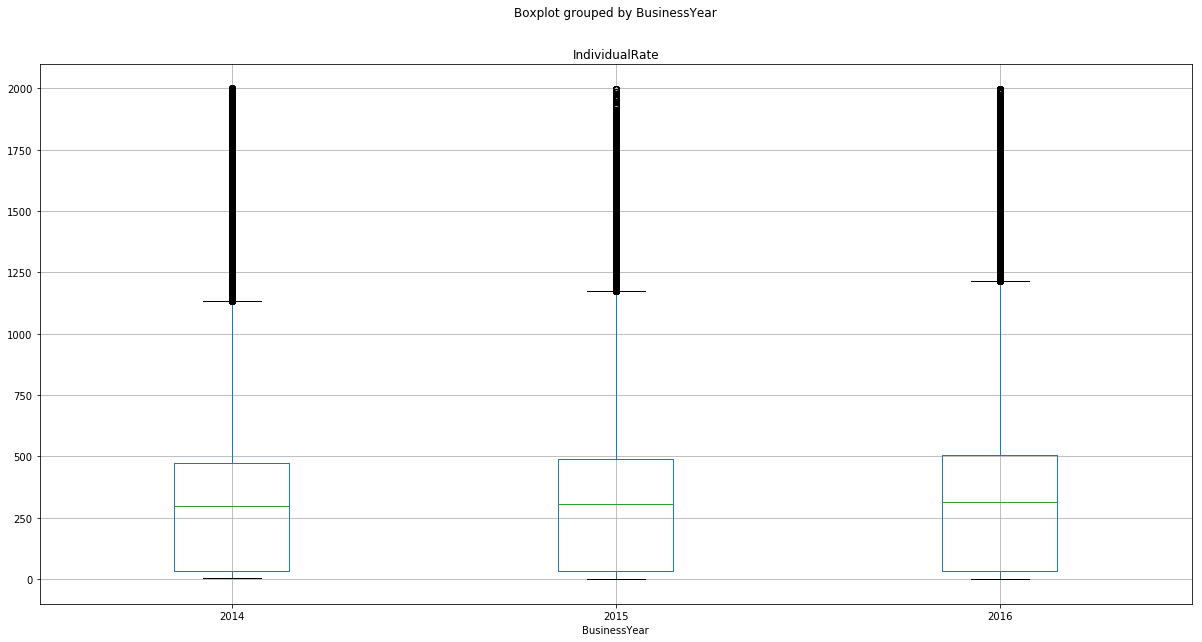

In [47]:
data1.boxplot(column = "IndividualRate", by = "BusinessYear",figsize=(20,10))

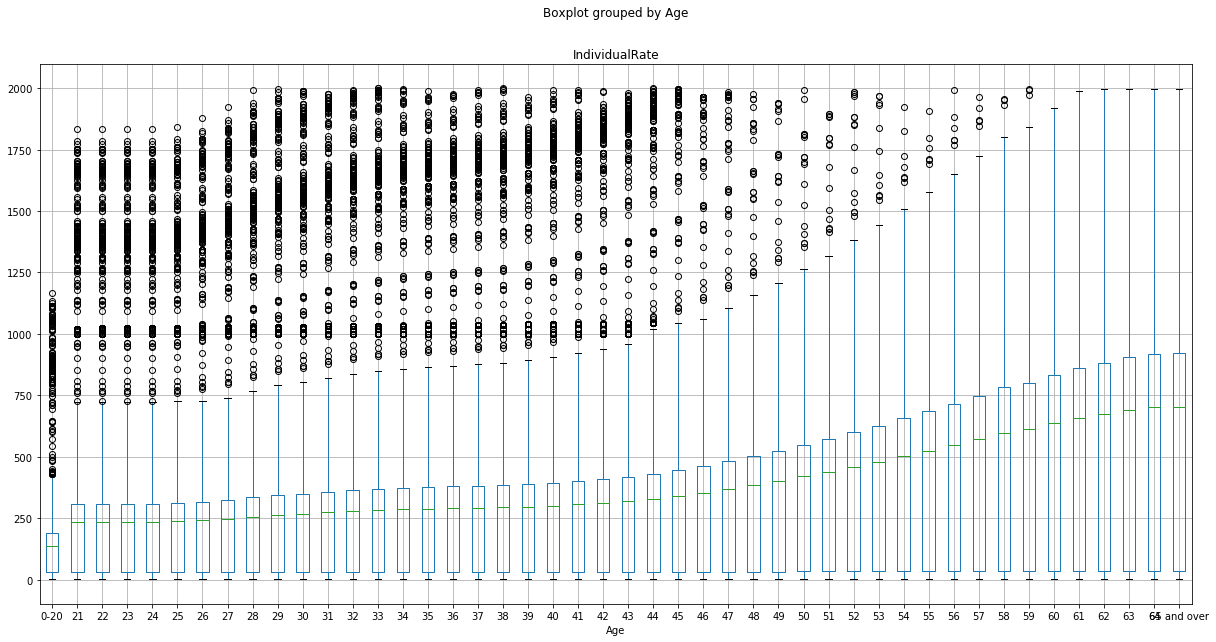

In [48]:
data1[data1.Age != 'Family Option'].boxplot(column = "IndividualRate", by = "Age",figsize=(20,10))

1. The median insurance cost is increasing over years. So we can say that the cost is increasing over time.
2. The insurance cost increases with age. After age of 44, it shows a grater increase. Older people pay more for insurance. While the young people below 20 pay around 150 (median), the odler people above 65 years pay around 700. So there is a difference of around 550

# Data Science Assignment 1 Question C

## Anaysing the Population of Selected Countries

The world population is growing and almost all the countries follow this trend. Here, this analysis tries to bring out some aspects of the population growth of some of the countries. 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Analysing the population growth of different countries

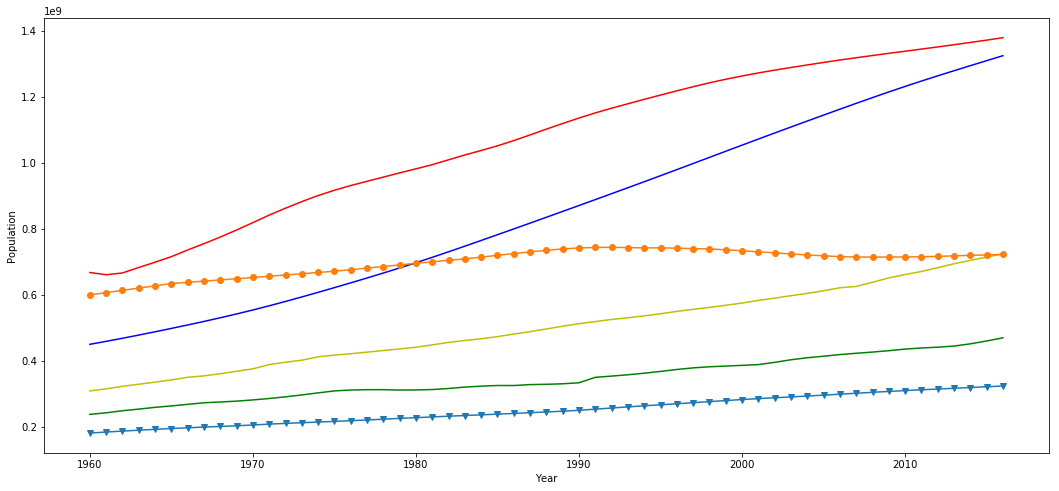

In [3]:
popu = pd.read_csv('wpop.csv')
bigpopu = popu[(popu['Country Name'] == 'India') | (popu['Country Name'] == 'China') | (popu['Country Name'] == 'United States') | (popu['Country Name'] == 'New Zealand') | (popu['Country Name'] == 'Australia') | (popu['Country Name'] == 'Russian Federation')]
del bigpopu['Country Code']
del bigpopu['Indicator Name']
del bigpopu['Indicator Code']
popumelt = pd.melt(bigpopu,id_vars=['Country Name'])
popuclean = popumelt.pivot(index='variable', columns='Country Name', values='value')

fig, popux = plt.subplots(figsize=(18,8))
popux.plot(popuclean['India'], 'b-')
popux.plot(popuclean['China'], 'r-')
popux.plot(popuclean['United States'], '-v')
popux.plot(popuclean['New Zealand']*100, '-g')
popux.plot(popuclean['Australia']*30, '-y')
popux.plot(popuclean['Russian Federation']*5, '-o')
popux.set_xlabel('Year')
popux.set_ylabel('Population')


Red: Population of China<br>
Blue: Population of India<br>
Violet: Poulation of USA<br>
Orange: Population of Russia * 5<br>
Yellow: Population of Australia * 30<br>
Green: Population of New Zealand * 100<br><br>

Note that some scaling factor is intrduced for low population countries to make the shape of the plot more visible.<br><br>
From the plot, it can be concluded that most of the selected countries shows an increasing population trend. Russian Federation shows a decreasing population trend.

### Analysing the Reason for Population growth

The reason for the population growth in different countries may be different. I am trying to analyse the reason based on the birth and death rates. As the population figures are highly different for different countries, it would be better to use the growth rate instead. The Birth, Death and Growth rate are plotted together for each countries

Selecting and cleaning up the Population Growth Rates for these countries.

In [4]:
pop = pd.read_excel('pg.xls')
bigpop = pop[(pop['Country Name'] == 'India') | (pop['Country Name'] == 'China') | (pop['Country Name'] == 'United States') | (pop['Country Name'] == 'New Zealand') | (pop['Country Name'] == 'Australia') | (pop['Country Name'] == 'Russian Federation')]
del bigpop['Country Code']
del bigpop['Indicator Name']
del bigpop['Indicator Code']
popmelt = pd.melt(bigpop,id_vars=['Country Name'])
popclean = popmelt.pivot(index='variable', columns='Country Name', values='value')
popclean

Country Name,Australia,China,India,New Zealand,Russian Federation,United States
variable,,,,,,
1960,2.266912,1.832868,1.946993,1.730890,1.469497,1.701993
1961,1.989740,-1.015528,1.985659,1.999440,1.110602,1.657730
1962,2.440639,0.820456,2.020385,2.542112,1.111455,1.537997
1963,1.917816,2.457647,2.046958,1.986583,1.110532,1.439165
1964,1.962354,2.320683,2.063583,2.094972,1.111100,1.389046
1965,1.959717,2.381368,2.074367,1.649506,1.110726,1.250172
1966,2.283184,2.787332,2.079793,1.791048,0.568816,1.154893
1967,1.262277,2.570698,2.089132,1.785233,0.569499,1.088881
1968,1.764159,2.610903,2.112385,0.877167,0.569377,0.998461


Selecting and cleaning up the Birth Rates for these countries.

In [5]:
br = pd.read_excel('br.xls')
bigbr = br[(br['Country Name'] == 'India') | (br['Country Name'] == 'China') | (br['Country Name'] == 'United States') | (br['Country Name'] == 'New Zealand') | (br['Country Name'] == 'Australia') | (br['Country Name'] == 'Russian Federation')]
del bigbr['Country Code']
del bigbr['Indicator Name']
del bigbr['Indicator Code']
brmelt = pd.melt(bigbr,id_vars=['Country Name'])
brclean = brmelt.pivot(index='variable', columns='Country Name', values='value')
brclean

Country Name,Australia,China,India,New Zealand,Russian Federation,United States
variable,,,,,,
1960,22.4,20.86,42.107,26.50,23.788,23.7
1961,22.9,18.02,41.865,27.10,22.734,23.3
1962,22.1,37.01,41.602,26.20,21.543,22.4
1963,21.5,43.37,41.317,25.50,20.257,21.7
1964,20.5,39.14,41.013,24.20,18.936,21.1
1965,19.6,37.88,40.696,22.90,17.677,19.4
1966,19.8,35.05,40.374,22.50,16.579,18.4
1967,19.4,33.96,40.057,22.50,15.708,17.8
1968,20.1,35.59,39.747,22.70,15.099,17.6


Selecting and cleaning up the Birth Rates for these countries.

In [6]:
dr = pd.read_excel('dr.xls')
bigdr = dr[(dr['Country Name'] == 'India') | (dr['Country Name'] == 'China') | (dr['Country Name'] == 'United States') | (dr['Country Name'] == 'New Zealand') | (dr['Country Name'] == 'Australia') | (dr['Country Name'] == 'Russian Federation')]
del bigdr['Country Code']
del bigdr['Indicator Name']
del bigdr['Indicator Code']
drmelt = pd.melt(bigdr,id_vars=['Country Name'])
drclean = drmelt.pivot(index='variable', columns='Country Name', values='value')
drclean

Country Name,Australia,China,India,New Zealand,Russian Federation,United States
variable,,,,,,
1960,8.6,25.43,22.423,8.80,8.304,9.5
1961,8.5,14.24,21.877,9.00,8.176,9.3
1962,8.7,10.02,21.337,8.90,8.099,9.5
1963,8.7,10.04,20.800,8.90,8.068,9.6
1964,9.0,11.50,20.267,8.80,8.081,9.4
1965,8.8,9.50,19.739,8.70,8.132,9.4
1966,8.9,8.83,19.217,8.90,8.221,9.5
1967,8.7,8.43,18.703,8.40,8.343,9.4
1968,9.1,8.21,18.199,8.90,8.493,9.8


### Plotting for China

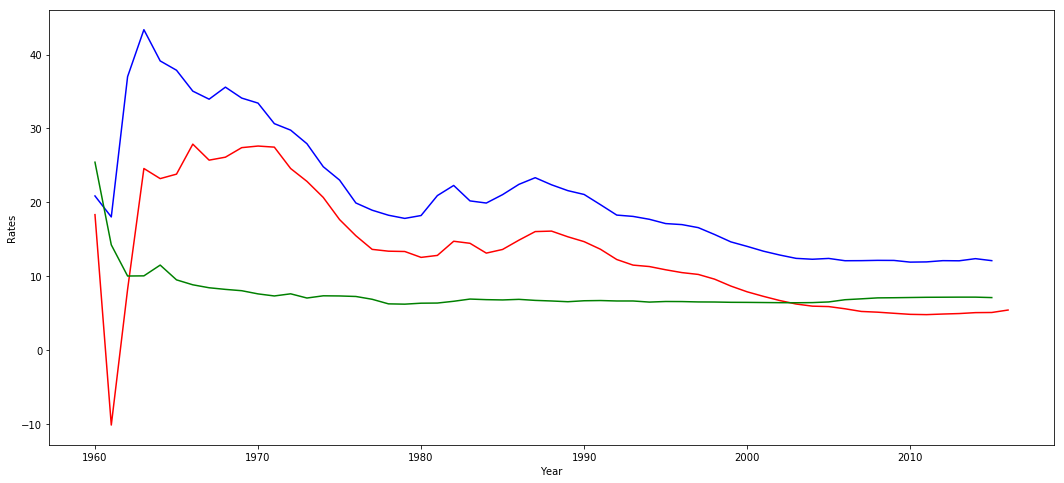

In [7]:
fig, ch = plt.subplots(figsize=(18,8))
ch.plot(popclean['China']*10, 'r-')
ch.plot(brclean['China'], 'b-')
ch.plot(drclean['China'], 'g-')
ch.set_xlabel('Year')
ch.set_ylabel('Rates')

Red: Population Growth Rate * 10<br>
Blue: Birth Rate<br>
Green: Death Rate<br>
<br>
Note that the growth rate is multiplied by 10 to get a clear view

#### Observations:
The shape of the Population growth curve is exactly similar to birth rate curve. Chinese population growth is mainly influenced by the birth rate. The death rate remains almost constant in most of the time.

### Plotting for India

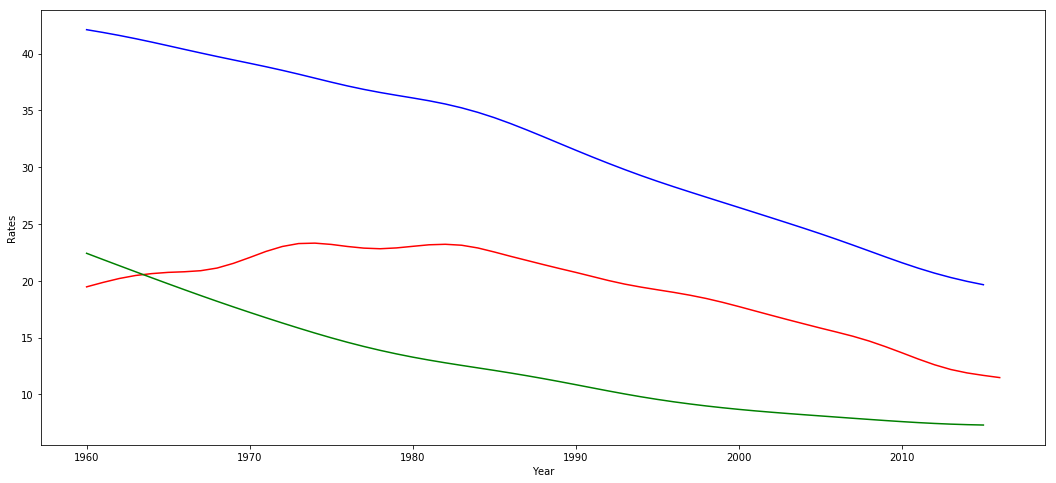

In [8]:
fig, ind = plt.subplots(figsize=(18,8))
ind.plot(popclean['India']*10, 'r-')
ind.plot(brclean['India'], 'b-')
ind.plot(drclean['India'], 'g-')
ind.set_xlabel('Year')
ind.set_ylabel('Rates')

Red: Population Growth Rate * 10<br>
Blue: Birth Rate<br>
Green: Death Rate<br>
<br>
Note that the growth rate is multiplied by 10 to get a clear view

#### Observations:
Upto mid 70s, the Indian population growth rate increases even though birth rate shows a constant decreasing trend. But after mid 80s, population growth rate shows the same trend as the birth rate. 

### Plotting for USA

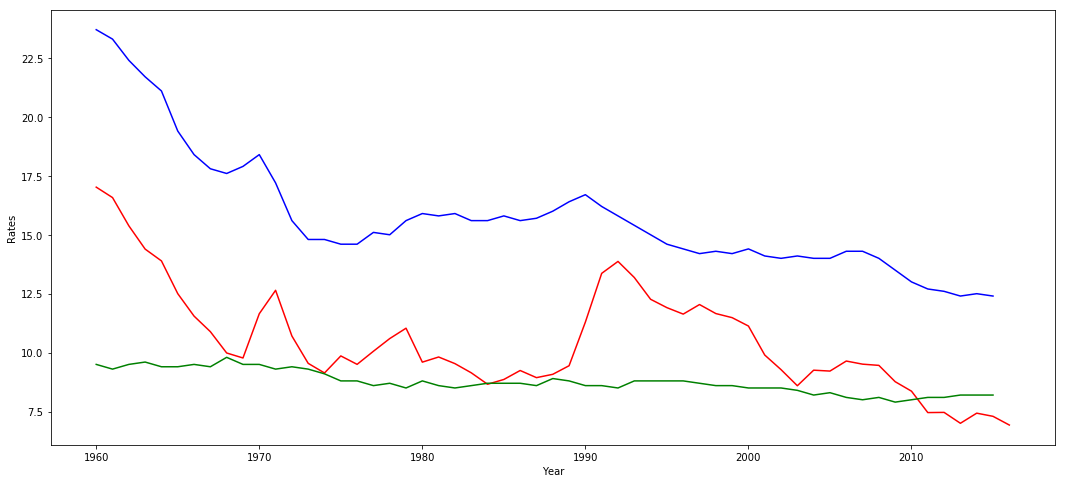

In [9]:
fig, usa = plt.subplots(figsize=(18,8))
usa.plot(popclean['United States']*10, 'r-')
usa.plot(brclean['United States'], 'b-')
usa.plot(drclean['United States'], 'g-')
usa.set_xlabel('Year')
usa.set_ylabel('Rates')

Red: Population Growth Rate * 10<br>
Blue: Birth Rate<br>
Green: Death Rate<br>
<br>
Note that the growth rate is multiplied by 10 to get a clear view

#### Observations:
Just like China, US population growth rate is also almost always similar to the birth rate. The death rate remains almost constant.

### Plotting for Russian Federation

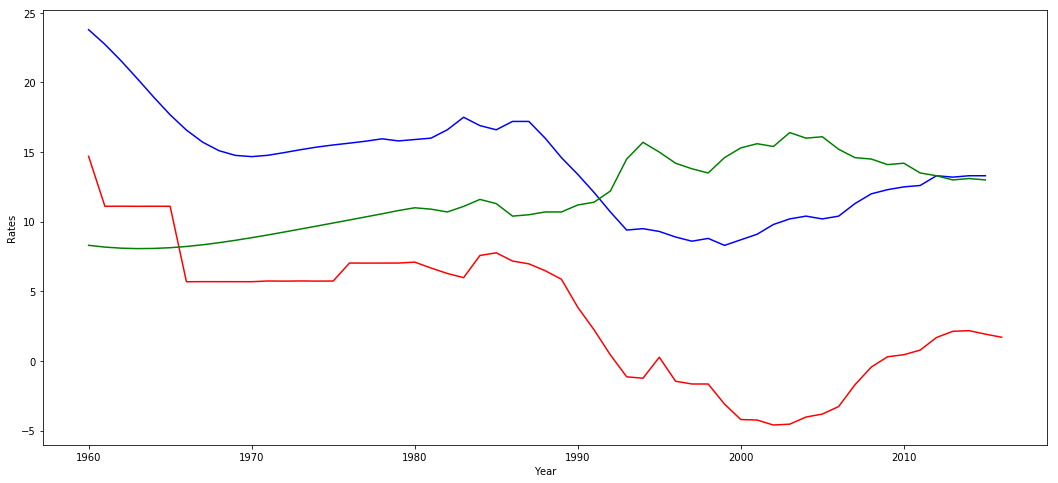

In [10]:
fig, rf = plt.subplots(figsize=(18,8))
rf.plot(popclean['Russian Federation']*10, 'r-')
rf.plot(brclean['Russian Federation'], 'b-')
rf.plot(drclean['Russian Federation'], 'g-')
rf.set_xlabel('Year')
rf.set_ylabel('Rates')

Red: Population Growth Rate * 10<br>
Blue: Birth Rate<br>
Green: Death Rate<br>
<br>
Note that the growth rate is multiplied by 10 to get a clear view

#### Observations:
Russia shows some different trends. Although Russian population growth rate is predominantly dependant on the birth rate, we can see a high influence of the death rate especially 2000 - 2010  period. Although birth rate slowly increases, the population growth grows down.

### Plotting for Australia

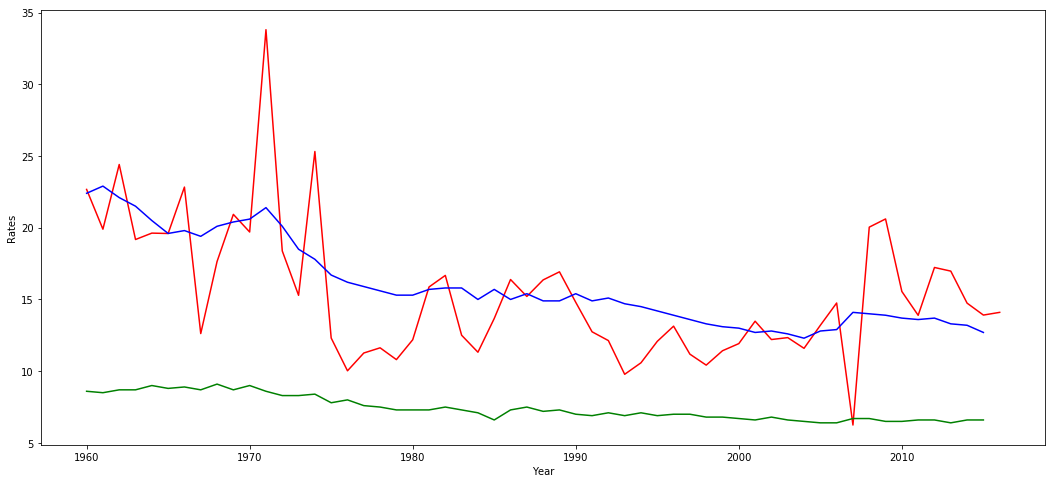

In [11]:
fig, au = plt.subplots(figsize=(18,8))
au.plot(popclean['Australia']*10, 'r-')
au.plot(brclean['Australia'], 'b-')
au.plot(drclean['Australia'], 'g-')
au.set_xlabel('Year')
au.set_ylabel('Rates')

Red: Population Growth Rate * 10<br>
Blue: Birth Rate<br>
Green: Death Rate<br>
<br>
Note that the growth rate is multiplied by 10 to get a clear view

#### Observations:
Australia shows an interesting trend. Even though the death and birth rate dont vary much, the population grouth rate shows big changes frequently. Most probably this is due to the migration happened in different periods. Since the population is also comparitively lower, even the small changes in population will result in big changes in population growth rae. This proves that Australia is a migrant country.

### Plotting  for New Zealand

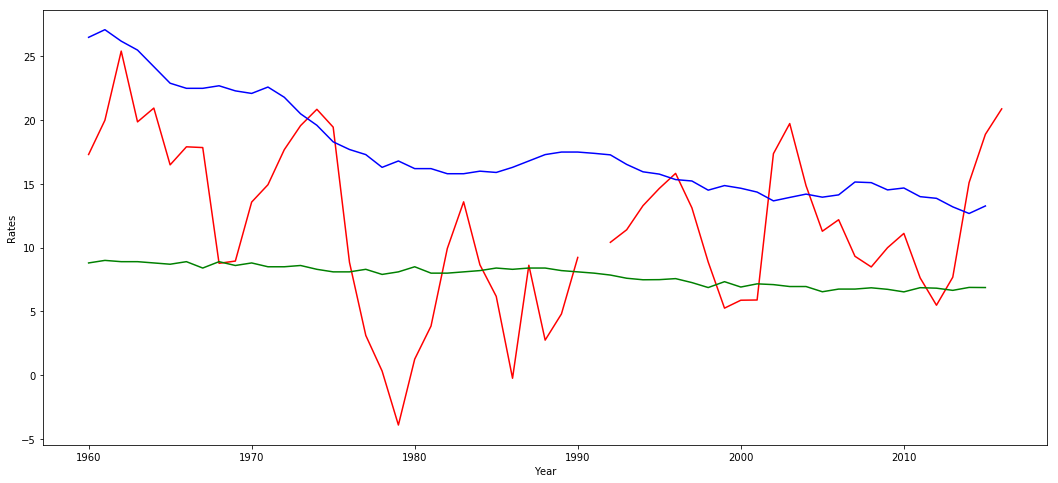

In [12]:
fig, nz = plt.subplots(figsize=(18,8))
nz.plot(popclean['New Zealand']*10, 'r-')
nz.plot(brclean['New Zealand'], 'b-')
nz.plot(drclean['New Zealand'], 'g-')
nz.set_xlabel('Year')
nz.set_ylabel('Rates')

Red: Population Growth Rate * 10<br>
Blue: Birth Rate<br>
Green: Death Rate<br>
<br>
Note that the growth rate is multiplied by 10 to get a clear view

#### Observations:
New Zealand also shows similar trend as Australia. The effect of migration is even more evident here.

## Making a Motion Chart

#### Combining all rates into one table

In [13]:
popmelt1 = popmelt.rename(columns={'variable':'year', 'value':'GrowthRate'})
brmelt1 = brmelt.rename(columns={'variable':'year', 'value':'BirthRate'})
drmelt1 = drmelt.rename(columns={'variable':'year', 'value':'DeathRate'})
joinedrates = popmelt1.merge(brmelt1, on=['Country Name', 'year']).merge(drmelt1, on=['Country Name', 'year'])
joinedrates

,Country Name,year,GrowthRate,BirthRate,DeathRate
0,Australia,1960,2.266912,22.400,8.600
1,China,1960,1.832868,20.860,25.430
2,India,1960,1.946993,42.107,22.423
3,New Zealand,1960,1.730890,26.500,8.800
4,Russian Federation,1960,1.469497,23.788,8.304
5,United States,1960,1.701993,23.700,9.500
6,Australia,1961,1.989740,22.900,8.500
7,China,1961,-1.015528,18.020,14.240
8,India,1961,1.985659,41.865,21.877
9,New Zealand,1961,1.999440,27.100,9.000


In [14]:
from motionchart.motionchart import MotionChart, MotionChartDemo

In [15]:
%%html
<style>
.output_wrapper, .output {
    height:auto !important;
    max-height:1000px;  /* your desired max-height here */
}
.output_scroll {
    box-shadow:none !important;
    webkit-box-shadow:none !important;
}
</style>

In [16]:
mChart = MotionChart(df = joinedrates, key='year', x='DeathRate', y='BirthRate', xscale='linear', yscale='linear',
                     size='GrowthRate', color='Country Name', category='Country Name')

mChart.to_notebook()

The motion chart describes a lot of things. Compared to all other countries, China fluctuates very much. This is because of their improvements in the public health sector and strong dicision taken for birth and population control. The chart proves that the programs were successful. US, Australia and New zealand shows a consistant death and birth rates. But he population growth rate (The size) of Australia, and New Zealand changes very much which must be because of the migration as discussed before. India shows a gradual movement from high death rate and high birth rate to both low. The size also decreases consistently. Russis shows a misterious increase in death rate after 1990, which is explained by some web sources as " because of vascular disease and violent deaths (mainly suicides, homicides, unintentional poisoning, and traffic incidents)". It must be an after effect of the dissolution of the Soviet Union.